# Предварительный анализ данных

## Введение


**Что такое предварительный анализ данных?**

Предварительный анализ данных (EDA - Exploratory Data Analysis) - это получение представления о наборе данных путем обобщения его основных характеристик и их визуального отображения. Этот шаг очень важен, особенно когда речь идет о подготовке данных для применения методов машинного обучения. Визуализация в EDA включает в себя гистограммы, графики, диаграммы рассеяния и многое другое.

**Какие данные мы исследуем?**



Набор данных о людях и их ЗП. Данные содержат более 10 000 строк и более 10 столбцов. Далее мы изучим данные и подготовим их к моделированию.



---



## 1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
from sklearn import preprocessing



---



## 2. Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas (опционально можно подключить гугл диск, чтобы брать датасеты из него)

In [2]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head(5)               

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [3]:
df.tail(5)                        # To display the botton 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,0


In [4]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64



---



## 3. Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary             int64
dtype: object



---



## 4. Удаление нерелевантных колонок

Этот шаг, в каждом анализе данных, потому что иногда в наборе данных представлены неиспользуемые столбцы, которые следует отбросить. 

In [6]:
df = df.drop(['fnlwgt'], axis=1)
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1




---



## 5. Переименование столбцов

В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [7]:
df = df.rename(columns={"hours-per-week": "hpw"})
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [8]:
num_replace = {'salary': {'<=50K': 0, '>50K': 1}, 
                'sex': {' Male': 1, ' Female': 0}
              }

df = df.replace(num_replace)
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


In [9]:
le = preprocessing.LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['native-country'] = le.fit_transform(df['native-country'])
df['race'] = le.fit_transform(df['race'])
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,native-country,salary
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,1
1,50,6,9,13,2,4,0,4,1,0,0,13,39,1
2,38,4,11,9,0,6,1,4,1,0,0,40,39,1
3,53,4,1,7,2,6,0,2,1,0,0,40,39,1
4,28,4,9,13,2,10,5,2,0,0,0,40,5,1
5,37,4,12,14,2,4,5,4,0,0,0,40,39,1
6,49,4,6,5,3,8,1,2,0,0,0,16,23,1
7,52,6,11,9,2,4,0,4,1,0,0,45,39,0
8,31,4,12,14,4,10,1,4,0,14084,0,50,39,0
9,42,4,9,13,2,4,0,4,1,5178,0,40,39,0




---



## 6. Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [10]:
df.shape

(32561, 14)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3465, 14)


In [12]:
df.count()      # Used to count the number of rows

age               32561
workclass         32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hpw               32561
native-country    32561
salary            32561
dtype: int64

В датафрейме представлено 11914 строк, удалим 989 строк, содержащих дубликаты.

In [13]:
df = df.drop_duplicates()
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,native-country,salary
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,1
1,50,6,9,13,2,4,0,4,1,0,0,13,39,1
2,38,4,11,9,0,6,1,4,1,0,0,40,39,1
3,53,4,1,7,2,6,0,2,1,0,0,40,39,1
4,28,4,9,13,2,10,5,2,0,0,0,40,5,1


In [14]:
df.count()

age               29096
workclass         29096
education         29096
education-num     29096
marital-status    29096
occupation        29096
relationship      29096
race              29096
sex               29096
capital-gain      29096
capital-loss      29096
hpw               29096
native-country    29096
salary            29096
dtype: int64



---



## 7. Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются. Также применяются тактики замены отсутствующих значений средним значением или средним значением этого столбца. В данном случае пропущено 99 значений - достаточная низкая доля всего набора данных из 10000 значений, поэтому удаление строк с пропущенными значениями не критично. 

In [15]:
print(df.isnull().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hpw               0
native-country    0
salary            0
dtype: int64


In [16]:
df = df.dropna()    # Dropping the missing values.
df.count()

age               29096
workclass         29096
education         29096
education-num     29096
marital-status    29096
occupation        29096
relationship      29096
race              29096
sex               29096
capital-gain      29096
capital-loss      29096
hpw               29096
native-country    29096
salary            29096
dtype: int64

Удалили все строки с пропущенными значениями (Cylinders и Horsepower (HP)).

In [17]:
print(df.isnull().sum())   # After dropping the values

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hpw               0
native-country    0
salary            0
dtype: int64




---



## 8. Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". Ниже показаны графики MSRP, Cylinders, Horsepower и EngineSize. На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы. 

<AxesSubplot:xlabel='age'>

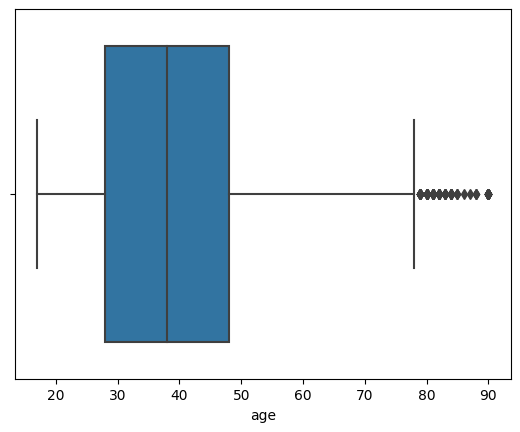

In [18]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='hpw'>

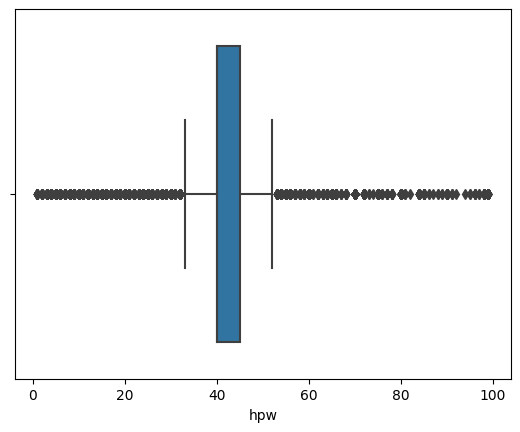

In [19]:
sns.boxplot(x=df['hpw'])

In [20]:
df.dtypes

age               int64
workclass         int32
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int64
capital-gain      int64
capital-loss      int64
hpw               int64
native-country    int32
salary            int64
dtype: object

In [21]:
# for x in df:
#     q75,q25 = np.percentile(df.loc[:,x],[75,25])
#     intr_qr = q75-q25

#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)

#     df.loc[df[x] < min,x] = np.nan
#     df.loc[df[x] > max,x] = np.nan

In [22]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hpw               0
native-country    0
salary            0
dtype: int64

In [23]:
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hpw               0
native-country    0
salary            0
dtype: int64

Как видно из вышеприведенного, около 1600 строк были пропущены. Но не получится полностью удалить выбросы, потому что даже после использования вышеописанной техники, возможно, 1-2 выброса останутся не удаленными, тем не менее, выбросов было более 100. 



---



## 9. Построение графиков различных характеристик относительно друг друга (разброс), относительно частоты (гистограмма)

### Гистограммы

Гистограмма показывает встречаемость переменных в интервале.

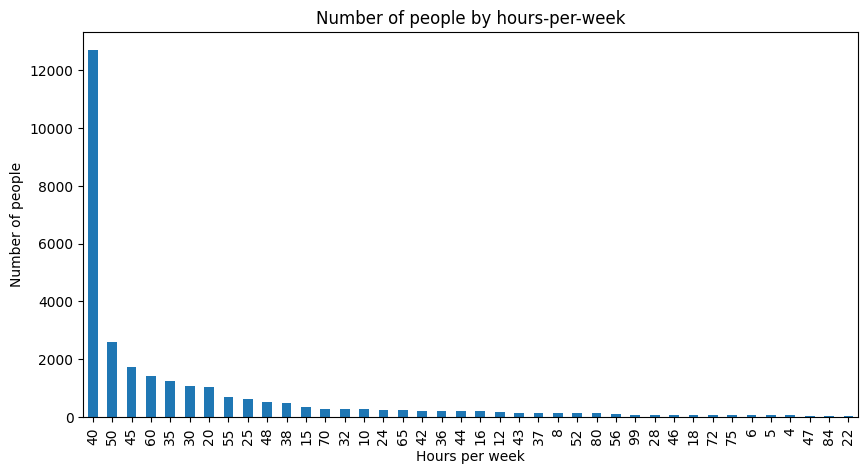

In [24]:
df.hpw.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of people by hours-per-week")
plt.ylabel('Number of people')
plt.xlabel('Hours per week');

### Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты. На приведенной ниже тепловой карте видно. что ценовая характеристика в основном зависит от мощности и года выпуска

In [25]:
df['capital-gain'].value_counts()
# df = df
# df = (df-df.min ())/(df.max ()-df.min ())
# df

0        26398
15024      341
7688       280
7298       244
99999      158
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,native-country,salary
age,1.000000,-0.009434,-0.004185,0.030144,-0.233216,-0.028163,-0.246811,0.047874,0.078009,0.074310,0.049570,0.039831,0.013004,-0.215270
workclass,-0.009434,1.000000,0.030679,0.051239,-0.056443,0.251654,-0.082117,0.054231,0.097088,0.033877,0.010704,0.138855,-0.005936,-0.047887
education,-0.004185,0.030679,1.000000,0.372553,-0.041011,-0.006203,-0.010924,0.007517,-0.028183,0.034410,0.022976,0.054714,0.059918,-0.091760
education-num,0.030144,0.051239,0.372553,1.000000,-0.071711,0.107045,-0.093623,0.034306,0.017203,0.124182,0.080259,0.141446,0.053808,-0.332210
marital-status,-0.233216,-0.056443,-0.041011,-0.071711,1.000000,-0.012767,0.161104,-0.073928,-0.118995,-0.042828,-0.032249,-0.177563,-0.028068,0.189776
occupation,-0.028163,0.251654,-0.006203,0.107045,-0.012767,1.000000,-0.079208,0.014625,0.084046,0.023513,0.014772,0.086960,-0.006602,-0.073405
relationship,-0.246811,-0.082117,-0.010924,-0.093623,0.161104,-0.079208,1.000000,-0.114121,-0.585425,-0.062338,-0.066692,-0.238538,-0.001345,0.245918
race,0.047874,0.054231,0.007517,0.034306,-0.073928,0.014625,-0.114121,1.000000,0.084092,0.016833,0.027549,0.048791,0.129094,-0.079826
sex,0.078009,0.097088,-0.028183,0.017203,-0.118995,0.084046,-0.585425,0.084092,1.000000,0.053001,0.051067,0.226271,-0.013417,-0.216816
capital-gain,0.074310,0.033877,0.034410,0.124182,-0.042828,0.023513,-0.062338,0.016833,0.053001,1.000000,-0.035294,0.077704,0.002588,-0.230696


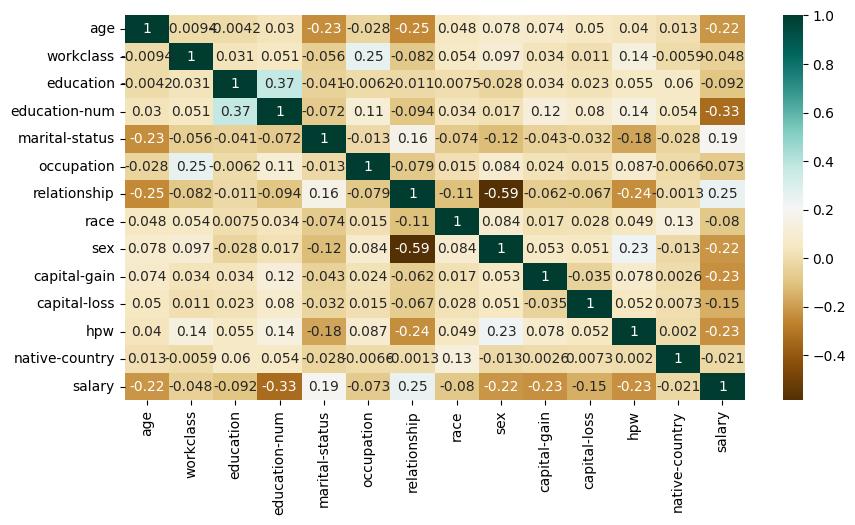

In [26]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Нормализация

In [27]:
from sklearn.model_selection import train_test_split
cdf = df
cdf = (df-df.min ())/(df.max ()-df.min ())
scaled_df = cdf

data_final = scaled_df
#data_final = df
X = data_final.loc[:, data_final.columns != 'salary']
y = data_final.loc[:, df.columns == 'salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Модели

## Linear regress

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin = LinearRegression()
lin.fit(X_train, y_train)

lin.coef_

print(mean_absolute_error(y_test,lin.predict(X_test)))

print(mean_squared_error(y_test,lin.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(lin.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lin.score(X_test, y_test)))

## Decision Tree

from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

print(mean_absolute_error(y_test, regr.predict(X_test)))

print(mean_squared_error(y_test, regr.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))

## Lasso

n_alphas = 1000
alphas = np.linspace(0.001, 200, n_alphas)
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

lasso_cv.coef_

lasso_cv.alpha_

print(mean_absolute_error(y_test, lasso_cv.predict(X_test)))

print(mean_squared_error(y_test, lasso_cv.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(lasso_cv.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lasso_cv.score(X_test, y_test)))

## Ridge

n_alphas = 1000
ridge_alphas = np.logspace(0.1, 200, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train, y_train)

ridge_cv.coef_

ridge_cv.alpha_

print(mean_absolute_error(y_test, ridge_cv.predict(X_test)))

print(mean_squared_error(y_test, ridge_cv.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(ridge_cv.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ridge_cv.score(X_test, y_test)))

## XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7)
xgb.fit(X_train, y_train)

print(mean_absolute_error(y_test,xgb.predict(X_test)))

print(mean_squared_error(y_test,xgb.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

## ElasticNet

from sklearn.linear_model import ElasticNetCV
elastic_alphas = np.logspace(0.1, 200, n_alphas)
elastic = ElasticNetCV(alphas=elastic_alphas, cv=5, random_state=17)
elastic.fit(X_train,y_train)

print(mean_absolute_error(y_test, elastic.predict(X_test)))

print(mean_squared_error(y_test, elastic.predict(X_test)))

print("Accuracy on training set: {:.3f}".format(elastic.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(elastic.score(X_test, y_test)))